In [1]:
from IPython.display import display, Math

In [2]:
# As seguintes librarias serão necessárias para resolver os exercícios
# O numpy permite efetuar cálculos de forma eficiente
# sobre vários números (arrays)
import numpy as np
# O matplotlib e o seu módulo pyplot oferecem
# uma interface simples para gerar gráficos
import matplotlib.pyplot as plt

# Exercício 1

Uma bola de futebol é chutada com velocidade de 100 km/h, a fazer um ângulo de 10º com o campo (horizontal).

a) Desenvolva um programa que obtenha a lei do movimento e a lei da velocidade em função do tempo, usando o método de Euler. Considere inicialmente só a força de gravidade.

Começamos por definir algumas variáveis com os valores que nos são dados, além disso separamos
a velocidade inicial nas suas coordenadas.

In [3]:
g = 9.8

# Convert velocity from km/h to m/s
vNorm = 100 * (1000 / 3600)
# Convert angle from degrees to radians
angle = 10 / 180 * np.pi

vXinitial = np.cos(angle) * vNorm
vYinitial = np.sin(angle) * vNorm

De seguida fazemos a integração de euler, como estamos a lidar com movimento bidimensional vamos usar arrays de arrays bidimensionais para realizar as contas (também era possível apenas criar novos arrays para a nova dimensão)

In [16]:
# Parâmetros
dt = 0.01
t0 = 0
tf = 1.2
# Agrupamos os valores de x e y em arrays para representar as quantidades
x0 = np.array([0, 0])
v0 = np.array([vXinitial, vYinitial])

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# O tamanho dos arrays para ser criados, como este tuple tem dois valores
# um array com `n + 1` de arrays bidimensionais
shape = (n + 1, 2)

# O tempo continua a ser unidimensional
t = np.zeros(n + 1)
# Todas as outras quantidades passam a 2D
x = np.zeros(shape)
v = np.zeros(shape)
a = np.zeros(shape)

# Insert initial values
a[0] = np.array([0, -g])
v[0] = v0
t[0] = t0
x[0] = x0

# O metódo de euler é feito como normal
for i in range(n):
    a[i + 1] = np.array([0, -g])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

Tem confiança que o seu programa está correto?

¯\\\_(ツ)_/¯

b) Atualize o seu programa de modo a considerar a força de resistência do ar. A força de resistência do ar ao
movimento da bola é:

$$
\left\{
\begin{array}{ll}
      F_x^\text{(res)} = - m D \left\lvert \vec{v} \right\rvert v_x \\
      F_y^\text{(res)} = - m D \left\lvert \vec{v} \right\rvert v_y \\
\end{array} 
\right.
$$

em que $D = g/v_T^2$, e a velocidade terminal é $v_T = 100 \, \text{km/h}$

In [5]:
# Valores oferecidos
vT = 100 * (1000 / 3600)
D = g / vT**2

tRes = np.zeros(n + 1)
xRes = np.zeros(shape)
vRes = np.zeros(shape)
aRes = np.zeros(shape)

# Insert initial values
aRes[0] = np.array([0, -g])
vRes[0] = v0
tRes[0] = t0
xRes[0] = x0

for i in range(n):
    vNorm = np.linalg.norm(vRes[i])
    # Cálculo da aceleração da resistência do ar
    aXRes = -D * vNorm * vRes[i][0]
    aYRes = -D * vNorm * vRes[i][1]
    
    aRes[i + 1] = np.array([aXRes, -g + aYRes])
    vRes[i + 1] = vRes[i] + aRes[i] * dt
    xRes[i + 1] = xRes[i] + vRes[i] * dt
    tRes[i + 1] = tRes[i] + dt

Faça o gráfico da altura em função da distância percorrida na horizontal.

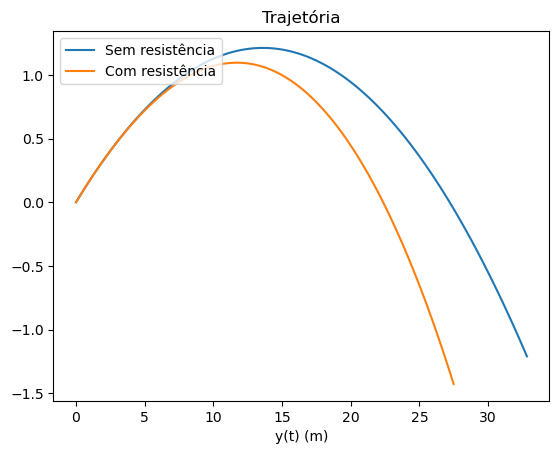

In [17]:
# Utilizamos a notação [:, i] para extrair o primeiro elemento de todos
# os vetores num array.
plt.plot(x[:, 0], x[:, 1], label = "Sem resistência")
plt.plot(xRes[:, 0], xRes[:, 1], label = "Com resistência")
plt.xlabel("x(t) (m)")
plt.xlabel("y(t) (m)")
plt.legend(loc="upper left")
plt.title("Trajetória")
plt.show()

c) Nas condições da alínea b), determine qual a altura máxima atingida pela bola e em que instante.

In [7]:
# np.argmax devolve o indíce do máximo no array
idx = xRes[:, 1].argmax()
yMax = xRes[idx, 1]
tMax = t[idx]

In [8]:
display(Math(r'y_{{ \text{{max}} }} = {:.8f}'.format(yMax)))
display(Math(r't_{{ \text{{max}} }} = {:.8f}'.format(tMax)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

d) Nas condições da alínea b), qual o alcance (distância entre a posição onde foi chutada e o ponto onde alcançou no campo) da trajetória da bola e quanto tempo demorou?

O alcance é a distância desde o ponto de partida até o ponto onde o corpo volta ao plano, ou seja $y = 0$, a maneira mais fácil de calcular é encontrando o indíce onde $y$ passa de positivo a negativo, ou seja $y_i \times y_{i + 1} < 0$.

In [9]:
for i in range(n):
    if xRes[i, 1] * xRes[i + 1, 1] < 0:
        idx = i
        break

xRange = xRes[idx, 0]
tRange = t[idx]

In [10]:
display(Math(r'x_{{ \text{{range}} }} = {:.8f}'.format(xRange)))
display(Math(r't_{{ \text{{range}} }} = {:.8f}'.format(tRange)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercício 2

Determinar se é golo ou não, a bola ser chutada do canto com rotação. Implementar o movimento da bola com rotação, usando o método de Euler.

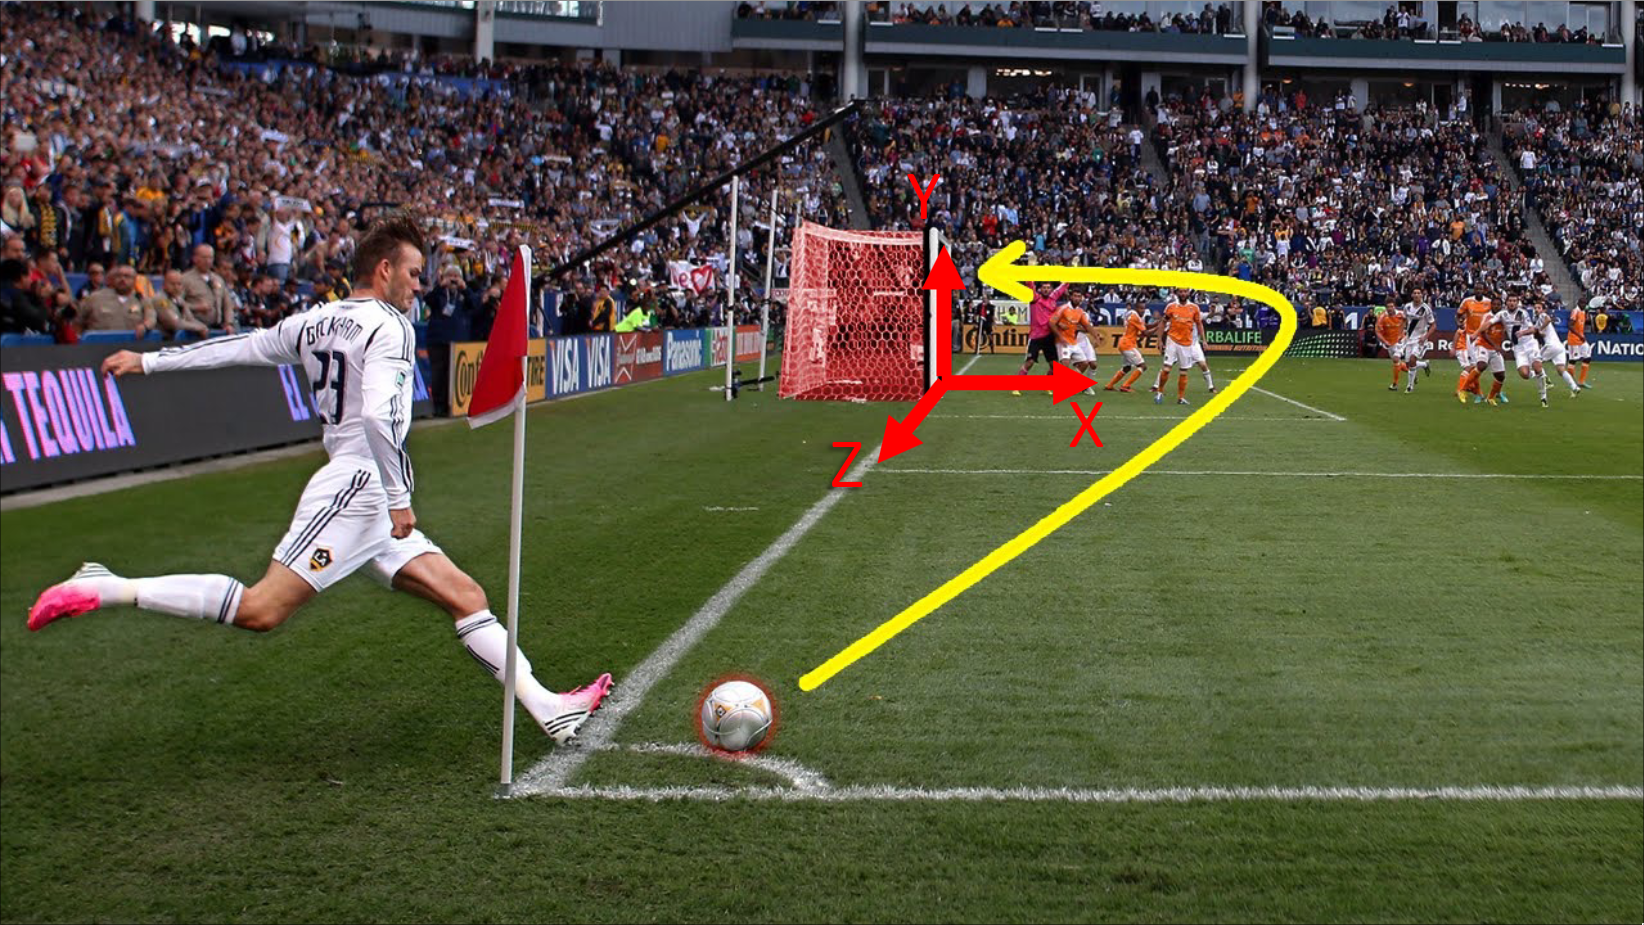

Dados:

$$
\begin{align*}
& t_0 = 0 \; \text{s} \\
& m = 0.45 \; \text{kg} \\
& r = 11 \; \text{cm} = 0.11 \; \text{m} \\
& \rho_\text{ar} = 1.225 \; \text{kg/m}^3
\end{align*}
$$

$$
\begin{align*}
&\vec{r} = (x_0, y_0, z_0) = (0, 0, 23.8) \; \text{m} \\
&\vec{v_0} = (v_{0x}, v_{0y}, v_{0z}) = (25, 5, -50) \; \text{m/s} \\
&\vec{\omega} = (\omega_x, \omega_y, \omega_z) = (0, 400, 0) \; \text{rad/s}
\end{align*}
$$

Fórmulas:

$$
\begin{align*}
A &= \pi r^2 \\
\vec{F}_\text{Magnus} &= \frac{1}{2} A \rho_\text{ar} r \vec{\omega} \times \vec{v}
\end{align*}
$$

A aceleração é dada então pela soma da aceleração gravítica e da aceleração infligida pela força de Magnus. Como sabemos $F = ma$ logo a aceleração pode ser obtida através de $a = \frac{F}{m}$

In [18]:
# Valores dados
m = 0.45
r = 0.11
A = np.pi * r**2
p_ar = 1.225
w = np.array([0, 400, 0])

# Parâmetros
dt = 0.001
t0 = 0
tf = 1
x0 = np.array([0, 0, 23.8])
v0 = np.array([25, 5, -50])

# Esta função calcula a aceleração a partir da velocidade atual
def accel(v):
    # Cálculo da força de Magnus, np.cross calcula o produto
    # vetorial de dois vetores.
    F_magnus = 1/2 * A * p_ar * r * np.cross(w, v)
    # Finalmente a aceleração é a soma da aceleração gravítica
    # e a soma da aceleração da força de Magnus
    return np.array([0, -g, 0]) + F_magnus/m

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# Agora lidamos com movimento tridimensional, logo precisamos de mais um
# elemento para os vetores das quantidades.
shape = (n + 1, 3)

t = np.zeros(n + 1)
x = np.zeros(shape)
v = np.zeros(shape)
a = np.zeros(shape)

# Insert initial values
a[0] = accel(v0)
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

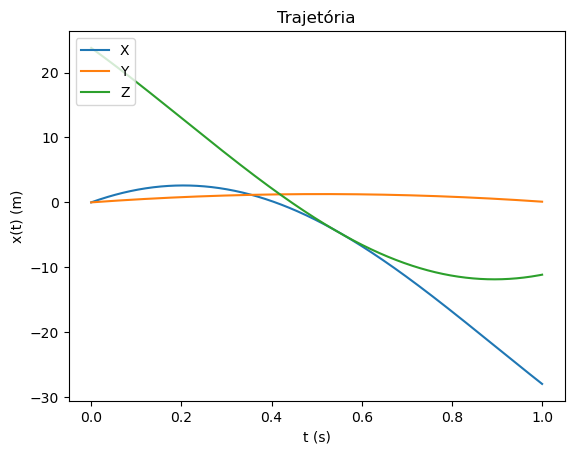

In [21]:
# Este gráfico irá apresentar cada um dos componentes da
# posição ao longo do tempo.
plt.plot(t, x[:, 0], label="X")
plt.plot(t, x[:, 1], label="Y")
plt.plot(t, x[:, 2], label="Z")
plt.xlabel("t (s)")
plt.ylabel("x(t) (m)")
plt.legend(loc="upper left")
plt.title("Trajetória")
plt.show()

Agora que já calculamos os valores para a posição, precisamos de saber quando é que a bola interseta com o plano da baliza, segundo a imagem o plano da baliza é perpendicular ao eixo X logo a bola irá intersetar o plano quando $x = 0$.

Mais uma vez podemos descobrir quando é que $x$ passa de positivo a negativo para descobrir este instante.

In [22]:
for i in range(n):
    if x[i, 0] * x[i + 1, 0] < 0:
        idx = i
        break

xCross = x[idx]
tCross = t[idx]

In [23]:
display(Math(r'x = [{:.8f}, {:.8f}, {:.8f}]'.format(xCross[0], xCross[1], xCross[2])))
display(Math(r't_{{ \text{{cross}} }} = {:.8f}'.format(tCross)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Uma baliza de futebol segundo a FIFA deve ter $7.32$ metros de comprimento e $2.44$ metros de altura, a bola estaria abaixo da trave e entre os dois postes, logo seria golo.